In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

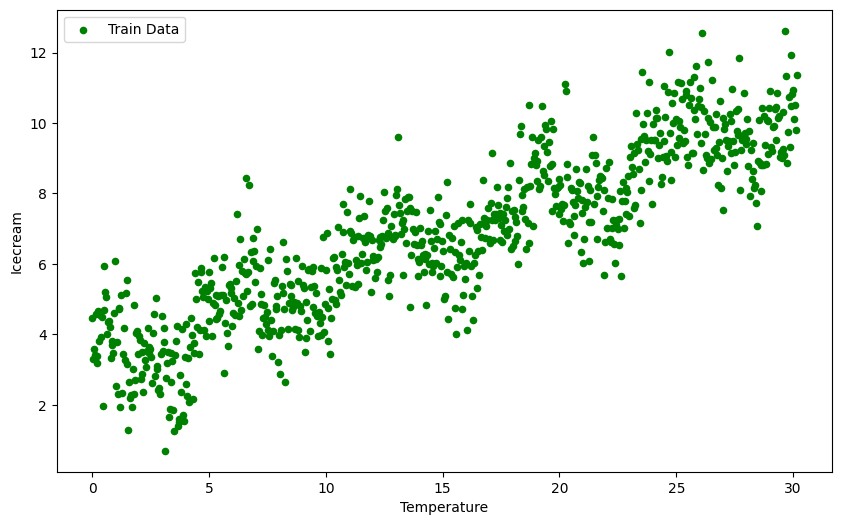

In [8]:

columns = ["Temperature", "Icecream"]
df = pd.read_fwf('train.txt', header=None, names=columns)

fig, ax = plt.subplots(figsize=(10,6))
df.plot(ax=ax, x='Temperature', y='Icecream', color='green', s=20,  marker='o', label='Train Data', kind='scatter');